# Data Manipulation

## Data alignment (lesson 3.5)

In [66]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [67]:
# data alignment in Series

In [68]:
sales = Series([15000,25000,34000],index=['East','West','South'])
sales

East     15000
West     25000
South    34000
dtype: int64

In [69]:
sales1 = Series([20000,30000,45000,34000],index=['East','West','South','North'])
sales1

East     20000
West     30000
South    45000
North    34000
dtype: int64

In [70]:
sales+sales1

East     35000.0
North        NaN
South    79000.0
West     55000.0
dtype: float64

In [71]:
sales.add(sales1,fill_value=0) # fill_value required to remove NaN - not a number

East     35000.0
North    34000.0
South    79000.0
West     55000.0
dtype: float64

In [72]:
# data alignment in DataFrame

In [73]:
sales_data = {'County': ['Croydon', 'Cornwall', 'Cumbria', 'Durham','Hampshire'],
        'Year': [2012, 2012, 2013, 2014, 2014],
        'Sales': [45000, 24000, 31000, 20000, 30000]}
sales_df = pd.DataFrame(sales_data)
sales_df

,County,Year,Sales
0,Croydon,2012,45000
1,Cornwall,2012,24000
2,Cumbria,2013,31000
3,Durham,2014,20000
4,Hampshire,2014,30000


In [74]:
sales_data2 = {'County': ['Croydon', 'Cornwall', 'Cumbria'],
        'Year': [2012, 2012, 2013],
        'Sales': [45000, 24000, 31000]}
sales_df2 = pd.DataFrame(sales_data2)
sales_df2

,County,Year,Sales
0,Croydon,2012,45000
1,Cornwall,2012,24000
2,Cumbria,2013,31000


In [75]:
sales_df['Sales']+sales_df2['Sales']

0    90000.0
1    48000.0
2    62000.0
3        NaN
4        NaN
Name: Sales, dtype: float64

In [76]:
sales_df['Sales'].add(sales_df2['Sales'],fill_value=0)

0    90000.0
1    48000.0
2    62000.0
3    20000.0
4    30000.0
Name: Sales, dtype: float64

In [77]:
# sorting

In [78]:
sales = Series((35000,40000,45000,50000),index=['East','West','North','South']) # tuple used here
sales

East     35000
West     40000
North    45000
South    50000
dtype: int64

In [79]:
sales.sort_index(ascending=1)

East     35000
North    45000
South    50000
West     40000
dtype: int64

In [80]:
sales.sort_index(ascending=0)

West     40000
South    50000
North    45000
East     35000
dtype: int64

In [81]:
# ranking

In [82]:
sales.rank(method='dense',ascending=1)

East     1.0
West     2.0
North    3.0
South    4.0
dtype: float64

In [83]:
sales.rank(ascending=0)

East     4.0
West     3.0
North    2.0
South    1.0
dtype: float64

In [84]:
total_sales=Series([12000,25000,27500,27150],index=['East','West','North','South'])
total_sales

East     12000
West     25000
North    27500
South    27150
dtype: int64

In [85]:
total_sales.rank(ascending=1)

East     1.0
West     2.0
North    4.0
South    3.0
dtype: float64

In [86]:
# sorting and ranking in DataFrames

In [87]:
sales_df.sort_index(ascending=1)

,County,Year,Sales
0,Croydon,2012,45000
1,Cornwall,2012,24000
2,Cumbria,2013,31000
3,Durham,2014,20000
4,Hampshire,2014,30000


In [88]:
sales_df.sort_values(by=['Sales'],ascending=1)

,County,Year,Sales
3,Durham,2014,20000
1,Cornwall,2012,24000
4,Hampshire,2014,30000
2,Cumbria,2013,31000
0,Croydon,2012,45000


In [89]:
sales_df.sort_values(by=['County'],ascending=1)

,County,Year,Sales
1,Cornwall,2012,24000
0,Croydon,2012,45000
2,Cumbria,2013,31000
3,Durham,2014,20000
4,Hampshire,2014,30000


In [90]:
sales_df['Sales Ranked'] = sales_df['Sales'].rank(ascending=1)
sales_df['Sales Ranked'].astype(int) # int here does not work not sure why
sales_df

,County,Year,Sales,Sales Ranked
0,Croydon,2012,45000,5.0
1,Cornwall,2012,24000,2.0
2,Cumbria,2013,31000,4.0
3,Durham,2014,20000,1.0
4,Hampshire,2014,30000,3.0


In [91]:
sales_df.describe()

,Year,Sales,Sales Ranked
count,5.0,5.000000,5.000000
mean,2013.0,30000.000000,3.000000
std,1.0,9513.148795,1.581139
min,2012.0,20000.000000,1.000000
25%,2012.0,24000.000000,2.000000
50%,2013.0,30000.000000,3.000000
75%,2014.0,31000.000000,4.000000
max,2014.0,45000.000000,5.000000


In [92]:
# find unique values in Series

In [93]:
numbers = Series([2500,2000,2500,2500,4500])
numbers

0    2500
1    2000
2    2500
3    2500
4    4500
dtype: int64

In [94]:
numbers.unique()

array([2500, 2000, 4500])

In [95]:
# find occurences of a particular value

In [96]:
numbers.value_counts()[2500]

3

## Using joins in DataFrames (lesson 3.6)

In [98]:
df_left = DataFrame({'Letter':['X','Y','Z','X','Y'], 'Data': range(5)})
df_left

,Letter,Data
0,X,0
1,Y,1
2,Z,2
3,X,3
4,Y,4


In [99]:
df_right = DataFrame({'Group data':[10,20]},index = ['X','Y'])
df_right

,Group data
X,10
Y,20


In [100]:
pd.merge(df_left,df_right,left_on = 'Letter',right_index = True)
# z is missing in d_right hence not merged

,Letter,Data,Group data
0,X,0,10
3,X,3,10
1,Y,1,20
4,Y,4,20


## Concatenation (lesson 3.7)¶

In [102]:
arr1 = np.arange(9).reshape(3,3)
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [103]:
np.concatenate([arr1,arr1],axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [104]:
np.concatenate([arr1,arr1],axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [105]:
# concatenation with Series

In [106]:
ser1 = Series([0,1,2],index = ['T','U','V'])
ser1

T    0
U    1
V    2
dtype: int64

In [107]:
ser2 = Series([3,4],index = ['W','X'])
ser2

W    3
X    4
dtype: int64

In [108]:
pd.concat([ser1,ser2], axis = 1) # column wise

/Users/Mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1
T,0.0,NaN
U,1.0,NaN
V,2.0,NaN
W,NaN,3.0
X,NaN,4.0


In [109]:
pd.concat([ser1,ser2], axis = 0)

T    0
U    1
V    2
W    3
X    4
dtype: int64

In [110]:
pd.concat([ser1,ser2]) # default is axis = 0

T    0
U    1
V    2
W    3
X    4
dtype: int64

In [111]:
pd.concat([ser1,ser2],keys = ['cat1','cat2'])

cat1  T    0
      U    1
      V    2
cat2  W    3
      X    4
dtype: int64

In [112]:
# concatenation with DataFrames

In [113]:
df1 = DataFrame(np.random.randn(4,3), columns = ['x','y','z'])
df1

,x,y,z
0,-0.066993,-0.857996,1.345741
1,2.038741,0.305255,-0.564516
2,1.671778,0.128000,0.996327
3,-0.237887,-0.387449,0.446189


In [114]:
df2 = DataFrame(np.random.randn(3,3), columns = ['y','q','x'])
df2

,y,q,x
0,1.250842,-1.121363,0.234316
1,0.082461,-0.988490,-2.934088
2,-0.365300,1.663159,2.513756


In [115]:
pd.concat([df1,df2]) # default is axis = 0

/Users/Mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,q,x,y,z
0,NaN,-0.066993,-0.857996,1.345741
1,NaN,2.038741,0.305255,-0.564516
2,NaN,1.671778,0.128000,0.996327
3,NaN,-0.237887,-0.387449,0.446189
0,-1.121363,0.234316,1.250842,NaN
1,-0.988490,-2.934088,0.082461,NaN
2,1.663159,2.513756,-0.365300,NaN


In [116]:
pd.concat([df1,df2], axis = 1)

,x,y,z,y,q,x
0,-0.066993,-0.857996,1.345741,1.250842,-1.121363,0.234316
1,2.038741,0.305255,-0.564516,0.082461,-0.988490,-2.934088
2,1.671778,0.128000,0.996327,-0.365300,1.663159,2.513756
3,-0.237887,-0.387449,0.446189,NaN,NaN,NaN


In [117]:
pd.concat([df1,df2], ignore_index = True) # sort index sequentially

/Users/Mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,q,x,y,z
0,NaN,-0.066993,-0.857996,1.345741
1,NaN,2.038741,0.305255,-0.564516
2,NaN,1.671778,0.128000,0.996327
3,NaN,-0.237887,-0.387449,0.446189
4,-1.121363,0.234316,1.250842,NaN
5,-0.988490,-2.934088,0.082461,NaN
6,1.663159,2.513756,-0.365300,NaN


## Combination (lesson 3.8)

In [118]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [119]:
sales1 = Series([10000,np.nan,20000,np.nan,30000,np.nan], 
                index = ['East','West','North','South','NorthEast','SouthEast'])
sales1

East         10000.0
West             NaN
North        20000.0
South            NaN
NorthEast    30000.0
SouthEast        NaN
dtype: float64

In [120]:
sales2 = Series([12000,14000,16000,18000,20000,22000], 
                index = ['East','West','North','South','NorthEast','SouthEast'])
sales2

East         12000
West         14000
North        16000
South        18000
NorthEast    20000
SouthEast    22000
dtype: int64

In [121]:
Series(np.where(pd.isnull(sales1),sales2,sales1),index = sales1.index)
# where null values in sales1, replace with values in sales2, otherwise print sales1

East         10000.0
West         14000.0
North        20000.0
South        18000.0
NorthEast    30000.0
SouthEast    22000.0
dtype: float64

In [122]:
sales1.combine_first(sales2)
# does the same thing

East         10000.0
West         14000.0
North        20000.0
South        18000.0
NorthEast    30000.0
SouthEast    22000.0
dtype: float64

In [123]:
# combine DataFrames

In [124]:
nan = np.nan
sales1_df = DataFrame({'East': [1500,nan,3500,nan], 
                       'West':[nan,4500,nan,5500], 
                       'South':[6500,nan,7500,nan]})
sales1_df

,East,West,South
0,1500.0,NaN,6500.0
1,NaN,4500.0,NaN
2,3500.0,NaN,7500.0
3,NaN,5500.0,NaN


In [125]:
sales2_df = DataFrame({'East':[1200,1300,nan,1600,1800], 
                       'West':[nan,5000,6000,7000,8000]})
sales2_df

,East,West
0,1200.0,NaN
1,1300.0,5000.0
2,NaN,6000.0
3,1600.0,7000.0
4,1800.0,8000.0


In [126]:
sales1_df.combine_first(sales2_df)

,East,South,West
0,1500.0,6500.0,NaN
1,1300.0,NaN,4500.0
2,3500.0,7500.0,6000.0
3,1600.0,NaN,5500.0
4,1800.0,NaN,8000.0


## Pivots (lesson 3.9)

In [127]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy.random import randn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
flights_df = sns.load_dataset('flights')
# load 'flights' dataset from seaborn into a DataFrame

In [129]:
flights_df.head()
# loads first 5 records by default unless specified in the brackets
# tells us existing value types and columns in dataset

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [130]:
flights_df.tail()
# loads last 5 records by default unless specified in the brackets

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [131]:
flights_df_pivot = flights_df.pivot('year', 'month', 'passengers')
flights_df_pivot

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [132]:
jes_file = pd.ExcelFile('data_files/Jes_excel.xlsx')

In [133]:
jes_df = jes_file.parse('Jessample') # parse takes you to the sheet
jes_df

# this is an alternative way to read an excel file
# single statement method: jes_df = pd.read_excel('data_files/Jes_excel.xlsx', sheet_name='Jessample')

,Unnamed: 0,date,Salesperson,value
0,0,2000-01-03,Allen,20000
1,1,2000-01-03,Allen,12000
2,2,2000-01-04,Allen,15000
3,3,2000-01-05,Allen,25000
4,4,2000-01-03,Mathew,3500
5,5,2000-01-04,Mathew,8000
6,6,2000-01-04,Mathew,6500
7,7,2000-01-05,Mathew,7500
8,8,2000-01-03,Clarke,6578
9,9,2000-01-04,Clarke,5467


In [134]:
jes_df_changed = jes_df.drop(columns='Unnamed: 0')
jes_df_changed

,date,Salesperson,value
0,2000-01-03,Allen,20000
1,2000-01-03,Allen,12000
2,2000-01-04,Allen,15000
3,2000-01-05,Allen,25000
4,2000-01-03,Mathew,3500
5,2000-01-04,Mathew,8000
6,2000-01-04,Mathew,6500
7,2000-01-05,Mathew,7500
8,2000-01-03,Clarke,6578
9,2000-01-04,Clarke,5467


In [135]:
jes_df_changed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
date           14 non-null datetime64[ns]
Salesperson    14 non-null object
value          14 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 464.0+ bytes


In [136]:
# jes_df_changed.pivot('date', 'Salesperson', 'value') function does not work due to duplicate values
jes_pivot = jes_df_changed.pivot_table(index='date', columns='Salesperson', values='value', aggfunc='sum')
# aggfunc can calculate mean, count, sum, etc.
# default aggfunc is 'mean'
jes_pivot

Salesperson,Allen,Clarke,Don,Mathew
date,,,,
2000-01-03,32000,6578,8900,3500
2000-01-04,15000,5467,7000,14500
2000-01-05,25000,7790,6500,7500


In [137]:
for group1 in jes_df_changed.groupby('Salesperson'):
    print(group1)
# for loop used to print each record

('Allen',         date Salesperson  value
0 2000-01-03       Allen  20000
1 2000-01-03       Allen  12000
2 2000-01-04       Allen  15000
3 2000-01-05       Allen  25000)
('Clarke',          date Salesperson  value
8  2000-01-03      Clarke   6578
9  2000-01-04      Clarke   5467
10 2000-01-05      Clarke   7790)
('Don',          date Salesperson  value
11 2000-01-03         Don   8900
12 2000-01-04         Don   7000
13 2000-01-05         Don   6500)
('Mathew',         date Salesperson  value
4 2000-01-03      Mathew   3500
5 2000-01-04      Mathew   8000
6 2000-01-04      Mathew   6500
7 2000-01-05      Mathew   7500)


In [138]:
# alternative method:
group2 = jes_df_changed.groupby('Salesperson')
group2

In [139]:
for group in group2:
    for item in group:
        print(item)

Allen
        date Salesperson  value
0 2000-01-03       Allen  20000
1 2000-01-03       Allen  12000
2 2000-01-04       Allen  15000
3 2000-01-05       Allen  25000
Clarke
         date Salesperson  value
8  2000-01-03      Clarke   6578
9  2000-01-04      Clarke   5467
10 2000-01-05      Clarke   7790
Don
         date Salesperson  value
11 2000-01-03         Don   8900
12 2000-01-04         Don   7000
13 2000-01-05         Don   6500
Mathew
        date Salesperson  value
4 2000-01-03      Mathew   3500
5 2000-01-04      Mathew   8000
6 2000-01-04      Mathew   6500
7 2000-01-05      Mathew   7500


In [140]:
for group1 in jes_df_changed.groupby('date'):
    for time in group1:
        print(time)

2000-01-03 00:00:00
         date Salesperson  value
0  2000-01-03       Allen  20000
1  2000-01-03       Allen  12000
4  2000-01-03      Mathew   3500
8  2000-01-03      Clarke   6578
11 2000-01-03         Don   8900
2000-01-04 00:00:00
         date Salesperson  value
2  2000-01-04       Allen  15000
5  2000-01-04      Mathew   8000
6  2000-01-04      Mathew   6500
9  2000-01-04      Clarke   5467
12 2000-01-04         Don   7000
2000-01-05 00:00:00
         date Salesperson  value
3  2000-01-05       Allen  25000
7  2000-01-05      Mathew   7500
10 2000-01-05      Clarke   7790
13 2000-01-05         Don   6500


## Groupby function (lesson 3.10)

In [141]:
weather_df = pd.read_excel('data_files/Weather_data_1.xlsx')
weather_df

,Day,City,Temperature,Wind speed
0,2019-01-01,Newyork,32,6
1,2019-01-02,Newyork,36,7
2,2019-01-03,Newyork,28,12
3,2019-01-04,Newyork,33,7
4,2019-01-01,Sydney,90,5
5,2019-01-02,Sydney,85,12
6,2019-01-03,Sydney,87,15
7,2019-01-04,Sydney,92,5
8,2019-01-01,Paris,45,20
9,2019-01-02,Paris,50,13


In [142]:
g = weather_df.groupby('City')
g

In [143]:
for x,y in g:
    print(x)
    print(y)
# x = city, y = entry
# for x,y in df.groupby('City'): works as well

Newyork
         Day     City  Temperature  Wind speed
0 2019-01-01  Newyork           32           6
1 2019-01-02  Newyork           36           7
2 2019-01-03  Newyork           28          12
3 2019-01-04  Newyork           33           7
Paris
          Day   City  Temperature  Wind speed
8  2019-01-01  Paris           45          20
9  2019-01-02  Paris           50          13
10 2019-01-03  Paris           54           8
11 2019-01-04  Paris           42          10
Sydney
         Day    City  Temperature  Wind speed
4 2019-01-01  Sydney           90           5
5 2019-01-02  Sydney           85          12
6 2019-01-03  Sydney           87          15
7 2019-01-04  Sydney           92           5


In [144]:
# access a specific group

In [145]:
g.get_group('Paris')

,Day,City,Temperature,Wind speed
8,2019-01-01,Paris,45,20
9,2019-01-02,Paris,50,13
10,2019-01-03,Paris,54,8
11,2019-01-04,Paris,42,10


In [146]:
# find maximum temp and wind speed in each city

In [147]:
g.max()

,Day,Temperature,Wind speed
City,,,
Newyork,2019-01-04,36,12
Paris,2019-01-04,54,20
Sydney,2019-01-04,92,15


In [148]:
g['Temperature'].max()

City
Newyork    36
Paris      54
Sydney     92
Name: Temperature, dtype: int64

In [149]:
# find average temp and wind speed in each city

In [150]:
g.mean()

,Temperature,Wind speed
City,,
Newyork,32.25,8.00
Paris,47.75,12.75
Sydney,88.50,9.25


In [151]:
%matplotlib inline

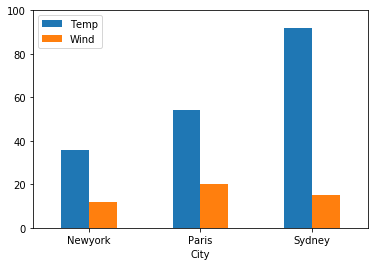

In [161]:
# g.plot() only works for csv files
g.agg(Temp=('Temperature', 'max'),
      Wind=('Wind speed', 'max')).plot(kind='bar', ylim=(0, 100), rot=0)

## Relationships between variables (lesson 3.11)

In [153]:
train_df = pd.read_csv('data_files/train.csv')

In [154]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [164]:
# relationship between surived and passenger class
sc = pd.crosstab(train_df.Survived,train_df.Pclass)
sc

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


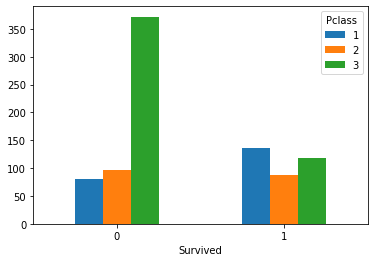

In [165]:
sc.plot.bar(rot = 0)

In [170]:
# relationship between surived and pclass in percentage
sc1 = pd.crosstab(train_df.Survived,train_df.Pclass).apply(lambda r: r/r.sum(), axis = 1)
# r/r.sum() = row/row.sum() to calculate percentages
# axis = 1 applies to each row
sc1

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


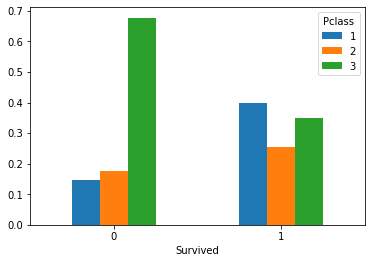

In [171]:
sc1.plot.bar(rot = 0)

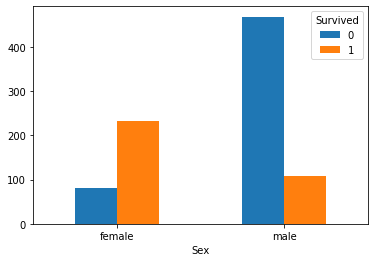

In [156]:
# relationship between gender and survivors
ss = pd.crosstab(train_df.Sex, train_df.Survived)
ss.plot.bar(rot = 0)

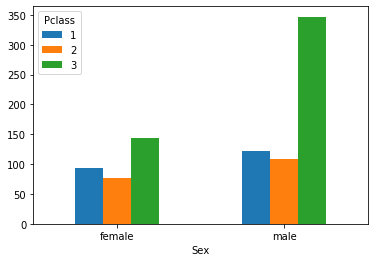

In [157]:
# relationship between gender and class
gc = pd.crosstab(train_df.Sex, train_df.Pclass)
gc.plot.bar(rot = 0)

In [172]:
# Exericse:
# Connect to a dataset and apply manipulation techniques and plot/graph wherever possible

In [236]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy.random import randn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [237]:
print(sns.get_dataset_names())

['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


In [238]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [239]:
days = tips_df.groupby('day')
days

In [240]:
for x,y in days:
    print(x)
    print(y)

Thur
     total_bill   tip     sex smoker   day    time  size
77        27.20  4.00    Male     No  Thur   Lunch     4
78        22.76  3.00    Male     No  Thur   Lunch     2
79        17.29  2.71    Male     No  Thur   Lunch     2
80        19.44  3.00    Male    Yes  Thur   Lunch     2
81        16.66  3.40    Male     No  Thur   Lunch     2
..          ...   ...     ...    ...   ...     ...   ...
202       13.00  2.00  Female    Yes  Thur   Lunch     2
203       16.40  2.50  Female    Yes  Thur   Lunch     2
204       20.53  4.00    Male    Yes  Thur   Lunch     4
205       16.47  3.23  Female    Yes  Thur   Lunch     3
243       18.78  3.00  Female     No  Thur  Dinner     2

[62 rows x 7 columns]
Fri
     total_bill   tip     sex smoker  day    time  size
90        28.97  3.00    Male    Yes  Fri  Dinner     2
91        22.49  3.50    Male     No  Fri  Dinner     2
92         5.75  1.00  Female    Yes  Fri  Dinner     2
93        16.32  4.30  Female    Yes  Fri  Dinner     2
94  

In [265]:
days.sum()

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


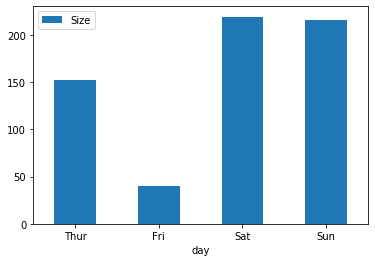

In [266]:
# number of customers each day
days.agg(Size=('size','sum')).plot(kind='bar', rot=0)

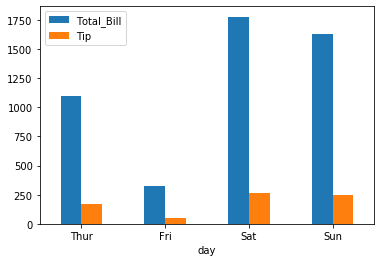

In [243]:
# total bills and tips over each day
days.agg(Total_Bill=('total_bill', 'sum'),
         Tip=('tip', 'sum')).plot(kind='bar', rot=0)

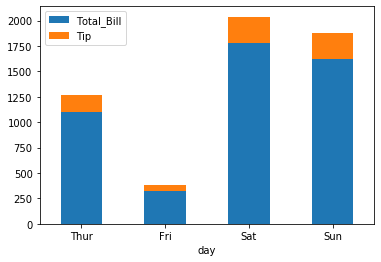

In [231]:
# total bills and tips over each day, stacked
days.agg(Total_Bill=('total_bill', 'sum'),
         Tip=('tip', 'sum')).plot(kind='bar', rot=0, stacked=True)

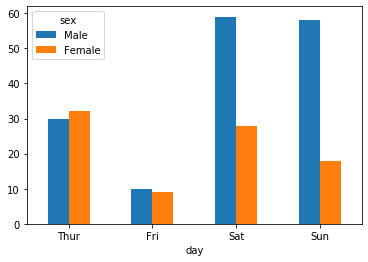

In [213]:
# number of male and female customers over each day
ds = pd.crosstab(tips_df.day, tips_df.sex)
ds.plot.bar(rot = 0)

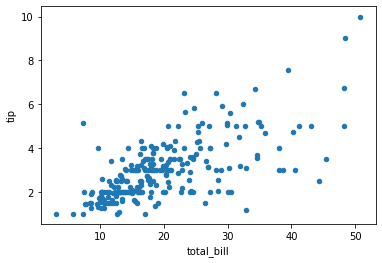

In [268]:
# relationship between total bills and tips
tips_df.plot(x='total_bill',y='tip',kind = 'scatter')

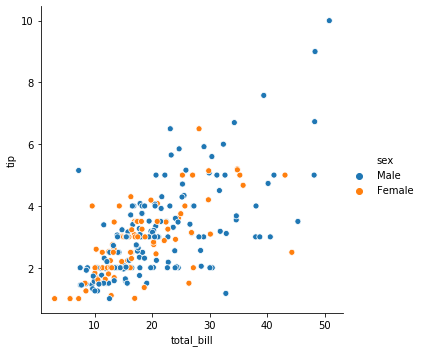

In [271]:
# relationship between total bills and tips
sns.relplot(x="total_bill", y="tip", hue='sex',data=tips_df);

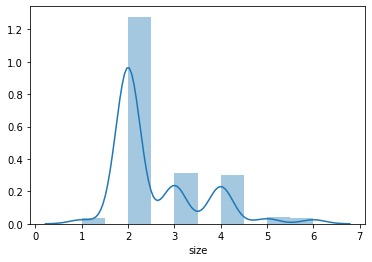

In [258]:
sns.distplot(tips_df['size'], kde=True, bins=10);